In [1]:
# import IPython.display as display
# from IPython.core.display import HTML 

In [2]:
%matplotlib inline

<img style="float: right;", src='img/cover.jpg'/>

# visualizing discussions on twitter with networkx

* kiran garimella, aalto university
* michael mathioudakis, aalto university




## social media
<img style='float: right; height:300px;' src='img/social_media.jpg'/>
#### users generate digital content
status updates, blog posts, pictures, videos, reviews, ...
#### users interact
comments, likes, ratings, re-posts
#### digital traces
we can observe human interactions at global scale

<img style='float:right; width: 250px' src='img/twitter_logo.png'/>
## twitter

#### microblogging platform
users post short messages, '__tweets__'

#### since 2006, 300m + active users

#### tweets, retweets, replies

show examples of real tweets, retweets, and replies

<img style='float:left; width:250px;' src='img/trump_tweet.png'>
<img style='float:left; width:250px;' src='img/greenwald_tweet.png'>
<img style='float:left; width:250px;' src='img/leme_tweet.png'>

can we learn something from the stucture of people's interactions?

we'll do that by visualizing __graphs__

graphs?

## graphs!

#### what is a graph?

data structure

two types of elements: nodes and edges

__todo__ include an example of a very simple social network

#### what are graphs used for?
represent social connections between people ...

... or represent networks
e.g., road networks, computer networks

graph vs network

## graphs with networkx

* python library
* create, process, visualize graphs
* development started in 2004
* mainly developed in 2014

## building a graph

__todo__ say we want to build earlier example

In [3]:
import networkx as nx

# initialize
graph = nx.Graph()

people = ['jere', 'ella', 'miika', 'anniina', 'mikko', 'olli', 'laura', 'maria']
connections = [('jere', 'ella'), ('ella', 'anniina'), ('ella', 'miika'),
                   ('mikko', 'ella'), ('anniina', 'mikko'), ('laura', 'jere'),
              ('olli', 'jere'), ('jere', 'maria'), ('miika', 'mikko'), ('maria', 'laura'),
              ('olli', 'laura')]

# add all nodes
for node in people:
    graph.add_node(node)

# add all edges
for node_a, node_b in connections:
    graph.add_edge(node_a, node_b)


## visualizing a graph

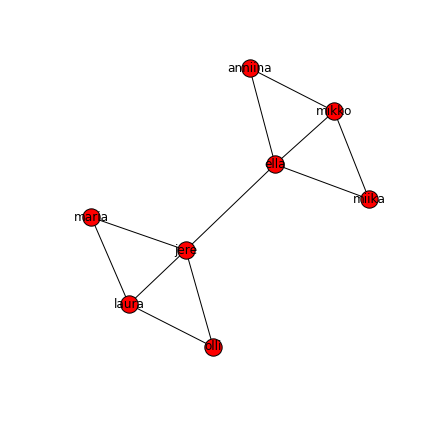

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')

nx.draw_networkx(graph, ax = ax)

fig.savefig('img/friends.pdf', dpi = 300)

## add color to nodes

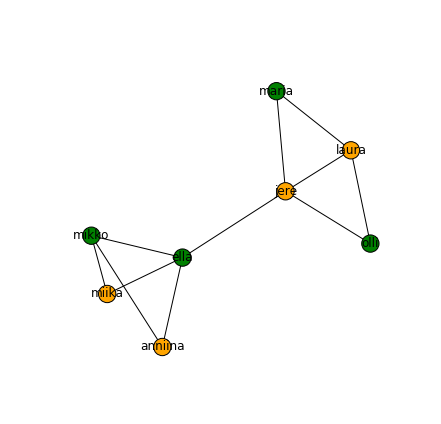

In [5]:
boy_color = 'green'
girl_color = 'orange'

people = ['jere', 'ella', 'miika', 'anniina', 'mikko', 'olli', 'laura', 'maria']
colors = [boy_color, girl_color, boy_color, girl_color, boy_color, boy_color,
          girl_color, girl_color]

fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off');
nx.draw_networkx(graph, ax = ax, node_color = colors);


## custom labels

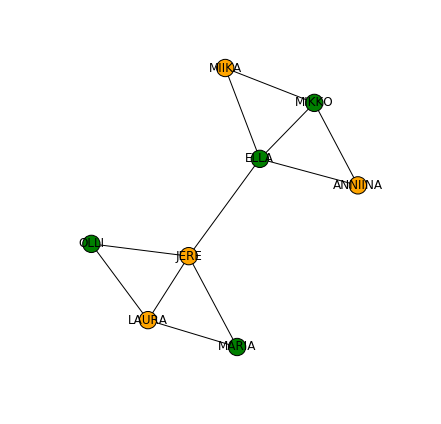

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')

labels = {}
for person in people:
    labels[person] = person.upper()
nx.draw_networkx(graph, labels = labels, ax = ax, node_color = colors);

## fixed node positions

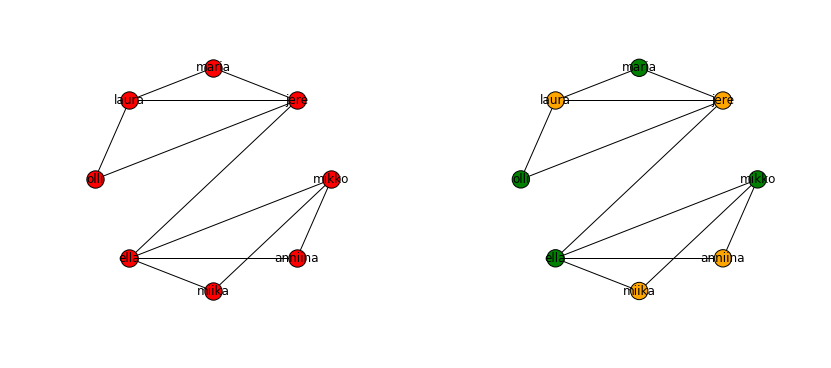

In [7]:
pos = nx.layout.circular_layout(graph)

fig, ax = plt.subplots(1, 2, figsize = (14, 6))
left_plot = ax[0]
right_plot = ax[1]
left_plot.axis('off')
right_plot.axis('off')

nx.draw_networkx(graph, pos = pos, ax = left_plot)
nx.draw_networkx(graph, pos = pos, ax = right_plot, node_color = colors)

## analysis of a graph

### degrees

In [8]:
number_of_friends = graph.degree()

for person in number_of_friends:
    print("{} has {} friends".format(person, number_of_friends[person]))

mikko has 3 friends
jere has 4 friends
maria has 2 friends
laura has 3 friends
ella has 4 friends
olli has 2 friends
miika has 2 friends
anniina has 2 friends


### clustering

In [21]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.manifold as manifold
import scipy.sparse as sp

SEED = 1

def spectral_clusters(g, n_clusters):
    spectral_clustering = cluster.SpectralClustering(n_clusters = n_clusters,
                                affinity = 'precomputed',
                                random_state = SEED)
    
    X = make_dense_adj_matrix(get_canonical(g))
    labels = spectral_clustering.fit_predict(X)
    return labels

def make_sparse_adj_matrix(g):
    """
    g: networkx.Graph()
    
    return adjacency matrix in scipy.csr sparse format
    """
    rows = []
    columns = []
    it = g.adjacency_iter()
    for adj_list in it:
        u = adj_list[0]
        for v in adj_list[1].keys():
            rows.append(u)
            columns.append(v)
    data = np.ones(len(rows))
    X = sp.csr_matrix((data, (rows, columns)))
    assert(is_symmetric(X))
    return X

def get_canonical(g):
    """
    Parameters
    ----------
    g: undirected graph (networkx.Graph)
    
    Return
    ------
    A canonical version of the input graph.
    """
    canonical =  nx.Graph()
    node_inv_idx = dict([(u, i) for i, u in enumerate(g.nodes())])
    edge_set = g.edges(data = True)
    for (u, v, d) in edge_set:
        i = node_inv_idx[u]
        j = node_inv_idx[v]
        canonical.add_edge(i, j, d)
    return canonical

def make_dense_adj_matrix(g):
    """
    g: networkx.Graph()
    
    return adjacency (nodes x nodes) matrix
    """
    X = np.matrix(np.zeros((len(g), len(g))))
    it = g.adjacency_iter()
    for adj_list in it:
        u = adj_list[0]
        for v in adj_list[1].keys():
            X[u, v] = 1
    assert(is_symmetric(X))
    return X

def is_symmetric(M):
    xdim, ydim = M.shape
    for x in range(xdim):
        for y in range(ydim):
            if M[x,y] != M[y,x]:
                return False
    return True

In [22]:
partition = spectral_clusters(graph, 2)

In [26]:
partition

{'anniina': 0,
 'ella': 0,
 'jere': 1,
 'laura': 1,
 'maria': 1,
 'miika': 0,
 'mikko': 0,
 'olli': 1}

In [27]:
import community

partition = community.best_partition(graph)

group_colors = []
for name in graph.nodes_iter():
    side = partition[name]
    color = 'blue' if side == 1 else 'grey'
    group_colors.append(color)

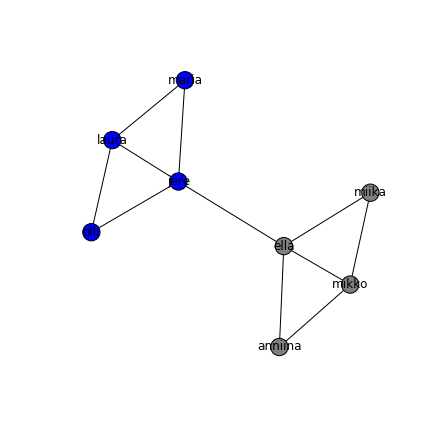

In [28]:
fig, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.axis('off')


nx.draw_networkx(graph, ax = ax, node_color = group_colors);

# back to twitter

* the twitter data
* retweets and replies

### dataset

__todo__ show actual data

### building graph

### visualizations

# deeper: what happens when people disagree?

* we notice a difference...
* let's make it more pronounced

### clustering

### visualize with clusters

# reply networks



# summary

# backup